In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style("darkgrid")


In [11]:
df = pd.read_csv('train_modelaccuracy.csv')
df

,Unnamed: 0,model,Loss(Cross_entropy),Train_Acc,Validation_Acc,Test_Acc,Total_Epoch,Total_Duration,TimeStamp
0,0,HeteroRGCN,0.417872,0.924167,0.786667,0.781145,20,0:00:05,2021-06-27 17:56:35
1,0,HAN,0.330170,0.871667,0.833333,0.840067,20,0:00:49,2021-06-27 17:57:25
2,0,HeteroRGCN,0.110369,0.995000,0.930000,0.934343,40,0:00:06,2021-06-27 17:57:31
3,0,HAN,0.196563,0.933333,0.830000,0.867003,40,0:01:36,2021-06-27 17:59:07
4,0,HeteroRGCN,0.037616,1.000000,0.963333,0.968013,60,0:00:09,2021-06-27 17:59:17
5,0,HAN,0.177909,0.936667,0.843333,0.860269,60,0:02:24,2021-06-27 18:01:41
6,0,HeteroRGCN,0.018344,1.000000,0.970000,0.976431,80,0:00:13,2021-06-27 18:01:54
7,0,HAN,0.137793,0.955833,0.843333,0.860269,80,0:03:13,2021-06-27 18:05:07
8,0,HeteroRGCN,0.014452,1.000000,0.973333,0.979798,100,0:00:16,2021-06-27 18:05:23
9,0,HAN,0.122974,0.960833,0.846667,0.855219,100,0:04:10,2021-06-27 18:09:33


In [12]:
df.model.replace({'HeteroRGCN':'RGCN'}, inplace=True)
df.head()

,Unnamed: 0,model,Loss(Cross_entropy),Train_Acc,Validation_Acc,Test_Acc,Total_Epoch,Total_Duration,TimeStamp
0,0,RGCN,0.417872,0.924167,0.786667,0.781145,20,0:00:05,2021-06-27 17:56:35
1,0,HAN,0.330170,0.871667,0.833333,0.840067,20,0:00:49,2021-06-27 17:57:25
2,0,RGCN,0.110369,0.995000,0.930000,0.934343,40,0:00:06,2021-06-27 17:57:31
3,0,HAN,0.196563,0.933333,0.830000,0.867003,40,0:01:36,2021-06-27 17:59:07
4,0,RGCN,0.037616,1.000000,0.963333,0.968013,60,0:00:09,2021-06-27 17:59:17


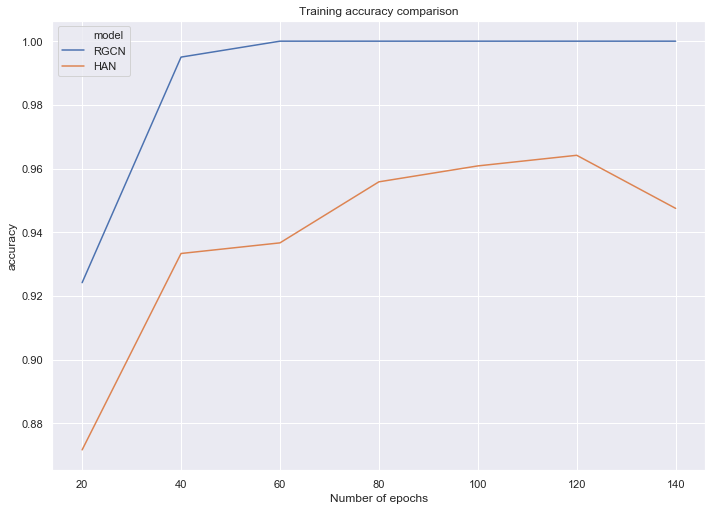

In [13]:
ax = sns.lineplot(data=df,x='Total_Epoch',y='Train_Acc',hue='model')
ax.set(xlabel='Number of epochs', ylabel='accuracy', title='Training accuracy comparison')
plt.show()

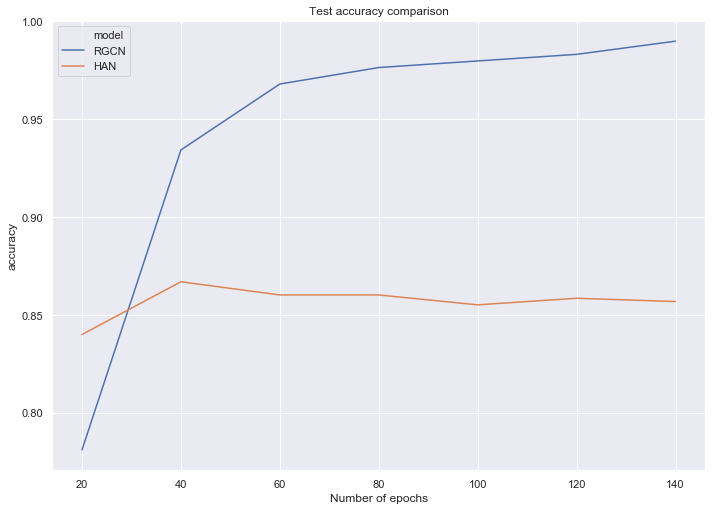

In [14]:
ax = sns.lineplot(data=df,x='Total_Epoch',y='Test_Acc',hue='model')
ax.set(xlabel='Number of epochs', ylabel='accuracy', title='Test accuracy comparison')
plt.show()

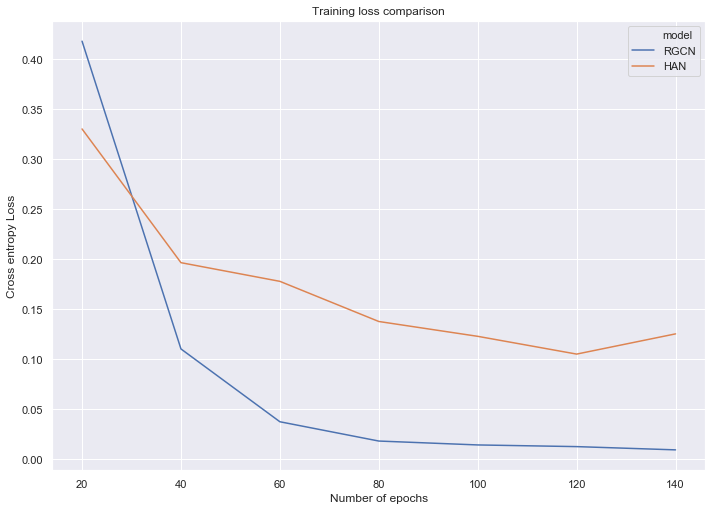

In [15]:
ax = sns.lineplot(data=df,x='Total_Epoch',y='Loss(Cross_entropy)',hue='model')
ax.set(xlabel='Number of epochs', ylabel='Cross entropy Loss', title='Training loss comparison')
plt.show()

In [29]:
def to_seconds(time_string):
    time_arr = time_string.split(sep=':')
    return int(time_arr[0])*3600 + int(time_arr[1])*60+int(time_arr[2])

In [30]:
from datetime import datetime
df['time_in_seconds'] = df['Total_Duration'].apply(lambda t : to_seconds(t))
df.head()

,Unnamed: 0,model,Loss(Cross_entropy),Train_Acc,Validation_Acc,Test_Acc,Total_Epoch,Total_Duration,TimeStamp,time_in_seconds
0,0,RGCN,0.417872,0.924167,0.786667,0.781145,20,0:00:05,2021-06-27 17:56:35,5
1,0,HAN,0.330170,0.871667,0.833333,0.840067,20,0:00:49,2021-06-27 17:57:25,49
2,0,RGCN,0.110369,0.995000,0.930000,0.934343,40,0:00:06,2021-06-27 17:57:31,6
3,0,HAN,0.196563,0.933333,0.830000,0.867003,40,0:01:36,2021-06-27 17:59:07,96
4,0,RGCN,0.037616,1.000000,0.963333,0.968013,60,0:00:09,2021-06-27 17:59:17,9


In [26]:
df['Total_Duration'].dtype

dtype('O')

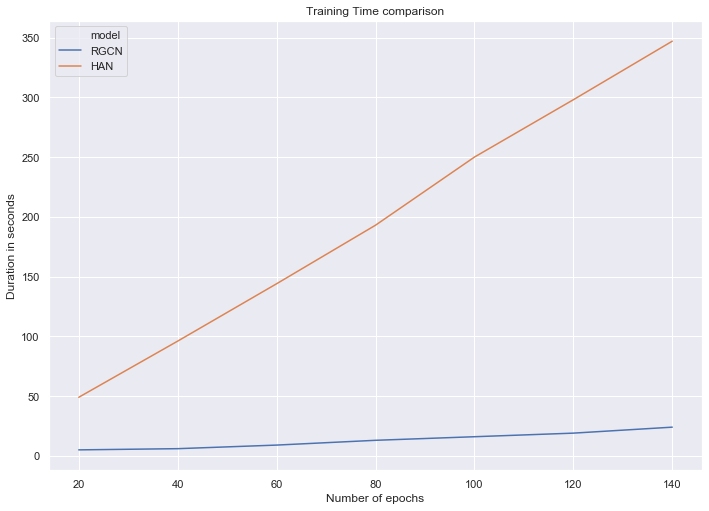

In [32]:
ax = sns.lineplot(data=df,x='Total_Epoch',y='time_in_seconds',hue='model')
ax.set(xlabel='Number of epochs', ylabel='Duration in seconds', title='Training Time comparison')
plt.show()